In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import spicy
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense



key_day = "DDR"
data_dir = f'../data/data{key_day}'
dataset_dir = f'../data/dataset{key_day}'

##ESCOGER MENOR TAMAÑO DE CARPETA

folders = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]
num_hermandades = len(folders)
tamanos =[]
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    file_count = len(os.listdir(folder_path))
    tamanos.append(file_count)

menor = min(tamanos)
print(menor)

##LIMITAR A MENOR TAMAÑO DE CARPETA
carpeta_fuente = data_dir
carpeta_destino = dataset_dir

carpetas = os.listdir(carpeta_fuente)

for carpeta in carpetas:
    if not carpeta.startswith("."):
        imagenes = os.listdir(carpeta_fuente + '/' + carpeta)

        for i, nombreimg in enumerate(imagenes):
            if i < 42:
                if not nombreimg.startswith("."):
                    shutil.copy(carpeta_fuente + '/' + carpeta + '/' + nombreimg, carpeta_destino + '/' + carpeta + '/' + nombreimg)

##CREAR GENERADORES DE IMAGENES CON DATA AUGMENTATION
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

##GENERADORES PARA ENTRENAMIENTO Y PRUEBAS
data_gen_entrenamiento = datagen.flow_from_directory(dataset_dir, target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory(dataset_dir, target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

In [4]:
#MODELO MOBILENET APP

mobilenetAPP = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')
mobilenetAPP.trainable = False

modelo_mobilenetAPP = tf.keras.Sequential([
    mobilenetAPP,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_hermandades, activation='softmax')
])
 
modelo_mobilenetAPP.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

EPOCAS = 100

historialMNAPP = modelo_mobilenetAPP.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

save_model(modelo_mobilenetAPP, f'../models/{key_day}/{key_day}MOBILENETV2{EPOCAS}.h5')



Epoch 1/100
8/8 [==============================] - 17s 2s/step - loss: 2.2334 - accuracy: 0.1941 - val_loss: 2.0714 - val_accuracy: 0.2143
Epoch 2/100
8/8 [==============================] - 9s 1s/step - loss: 1.8110 - accuracy: 0.2869 - val_loss: 1.6927 - val_accuracy: 0.3571
Epoch 3/100
8/8 [==============================] - 9s 1s/step - loss: 1.6169 - accuracy: 0.3797 - val_loss: 1.6029 - val_accuracy: 0.3750
Epoch 4/100
8/8 [==============================] - 9s 1s/step - loss: 1.4485 - accuracy: 0.4599 - val_loss: 1.4911 - val_accuracy: 0.4286
Epoch 5/100
8/8 [==============================] - 9s 1s/step - loss: 1.2073 - accuracy: 0.5907 - val_loss: 1.3580 - val_accuracy: 0.4821
Epoch 6/100
8/8 [==============================] - 10s 1s/step - loss: 1.1297 - accuracy: 0.6540 - val_loss: 1.2183 - val_accuracy: 0.5357
Epoch 7/100
8/8 [==============================] - 9s 1s/step - loss: 1.0223 - accuracy: 0.7131 - val_loss: 1.1030 - val_accuracy: 0.6607
Epoch 8/100
8/8 [===============

C:\Users\super\AppData\Local\Temp\ipykernel_9936\674965666.py:24: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(modelo_mobilenetAPP, f'../models/{key_day}/{key_day}MOBILENETV2{EPOCAS}.h5')


In [ ]:
#MODELO RESNETV2 APP - SOBREAJUSTE

from tensorflow.keras.applications import ResNet50V2

base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
modelo_resnet = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_hermandades, activation='softmax')
])

modelo_resnet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

EPOCAS = 30

historialRS = modelo_resnet.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

save_model(modelo_resnet, f'../models/{key_day}/{key_day}RESNET{EPOCAS}.h5')




In [ ]:
#MODELO EFFICENTNET APP - SOBREAJUSTE 

from tensorflow.keras.applications import EfficientNetV2B0

efficent = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficent.trainable = False

modelo_efficent = tf.keras.Sequential([
    efficent,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_hermandades, activation='softmax')
])

modelo_efficent.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

EPOCAS = 100

historialE = modelo_efficent.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

save_model(modelo_efficent, f'../models/{key_day}/{key_day}EFFICENT{EPOCAS}.h5')



In [6]:
from tensorflow.keras.applications import DenseNet121

densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet.trainable = False

modelo_densenet = tf.keras.Sequential([
    densenet,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_hermandades, activation='softmax')
])

modelo_densenet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

EPOCAS = 100

historialDN = modelo_densenet.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

save_model(modelo_densenet, f'../models/{key_day}/{key_day}DENSENET{EPOCAS}.h5')



Epoch 1/100
8/8 [==============================] - 43s 4s/step - loss: 2.1148 - accuracy: 0.1857 - val_loss: 2.1789 - val_accuracy: 0.1964
Epoch 2/100
8/8 [==============================] - 23s 3s/step - loss: 2.0313 - accuracy: 0.2363 - val_loss: 1.8038 - val_accuracy: 0.3571
Epoch 3/100
8/8 [==============================] - 23s 3s/step - loss: 1.7970 - accuracy: 0.3291 - val_loss: 1.8295 - val_accuracy: 0.3393
Epoch 4/100
8/8 [==============================] - 24s 3s/step - loss: 1.6494 - accuracy: 0.3544 - val_loss: 1.6888 - val_accuracy: 0.3929
Epoch 5/100
8/8 [==============================] - 24s 3s/step - loss: 1.5131 - accuracy: 0.4641 - val_loss: 1.5250 - val_accuracy: 0.4107
Epoch 6/100
8/8 [==============================] - 24s 3s/step - loss: 1.4405 - accuracy: 0.5148 - val_loss: 1.4775 - val_accuracy: 0.4821
Epoch 7/100
8/8 [==============================] - 24s 3s/step - loss: 1.3419 - accuracy: 0.5696 - val_loss: 1.4700 - val_accuracy: 0.5179
Epoch 8/100
8/8 [==========

C:\Users\super\AppData\Local\Temp\ipykernel_9936\491960328.py:24: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(modelo_densenet, f'../models/{key_day}/{key_day}DENSENET{EPOCAS}.h5')


In [8]:
from tensorflow.keras.applications import InceptionV3

inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception.trainable = False

modelo_inception = tf.keras.Sequential([
    inception,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_hermandades, activation='softmax')
])

modelo_inception.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

EPOCAS = 100

historial_inception = modelo_inception.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

save_model(modelo_inception, f'../models/{key_day}/{key_day}INCEPTION{EPOCAS}.h5')


Epoch 1/100
8/8 [==============================] - 32s 3s/step - loss: 2.3054 - accuracy: 0.1477 - val_loss: 2.0799 - val_accuracy: 0.3036
Epoch 2/100
8/8 [==============================] - 15s 2s/step - loss: 1.9423 - accuracy: 0.2785 - val_loss: 1.7247 - val_accuracy: 0.3393
Epoch 3/100
8/8 [==============================] - 16s 2s/step - loss: 1.6141 - accuracy: 0.4008 - val_loss: 1.6817 - val_accuracy: 0.3393
Epoch 4/100
8/8 [==============================] - 16s 2s/step - loss: 1.5045 - accuracy: 0.4177 - val_loss: 1.5138 - val_accuracy: 0.4286
Epoch 5/100
8/8 [==============================] - 16s 2s/step - loss: 1.3077 - accuracy: 0.5443 - val_loss: 1.5909 - val_accuracy: 0.4286
Epoch 6/100
8/8 [==============================] - 16s 2s/step - loss: 1.1701 - accuracy: 0.5654 - val_loss: 1.2079 - val_accuracy: 0.5536
Epoch 7/100
8/8 [==============================] - 16s 2s/step - loss: 1.1459 - accuracy: 0.5907 - val_loss: 1.3289 - val_accuracy: 0.5357
Epoch 8/100
8/8 [==========

C:\Users\super\AppData\Local\Temp\ipykernel_9936\1947213464.py:24: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(modelo_inception, f'../models/{key_day}/{key_day}INCEPTION{EPOCAS}.h5')


In [10]:
from tensorflow.keras.applications import NASNetMobile

nasnet = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
nasnet.trainable = False

modelo_nasnet = tf.keras.Sequential([
    nasnet,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_hermandades, activation='softmax')
])

modelo_nasnet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

EPOCAS = 100

historial_nasnet = modelo_nasnet.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

save_model(modelo_nasnet, f'../models/{key_day}/{key_day}NASNET{EPOCAS}.h5')



Epoch 1/100
8/8 [==============================] - 47s 3s/step - loss: 2.0644 - accuracy: 0.1435 - val_loss: 1.9482 - val_accuracy: 0.2321
Epoch 2/100
8/8 [==============================] - 11s 1s/step - loss: 1.9271 - accuracy: 0.2447 - val_loss: 1.7638 - val_accuracy: 0.3036
Epoch 3/100
8/8 [==============================] - 10s 1s/step - loss: 1.7151 - accuracy: 0.3291 - val_loss: 1.6503 - val_accuracy: 0.3393
Epoch 4/100
8/8 [==============================] - 10s 1s/step - loss: 1.5946 - accuracy: 0.4008 - val_loss: 1.5953 - val_accuracy: 0.3929
Epoch 5/100
8/8 [==============================] - 10s 1s/step - loss: 1.5267 - accuracy: 0.4599 - val_loss: 1.5503 - val_accuracy: 0.4107
Epoch 6/100
8/8 [==============================] - 10s 1s/step - loss: 1.3979 - accuracy: 0.5274 - val_loss: 1.4225 - val_accuracy: 0.5000
Epoch 7/100
8/8 [==============================] - 10s 1s/step - loss: 1.3333 - accuracy: 0.6160 - val_loss: 1.4120 - val_accuracy: 0.4107
Epoch 8/100
8/8 [==========

C:\Users\super\AppData\Local\Temp\ipykernel_9936\2295632753.py:24: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(modelo_nasnet, f'../models/{key_day}/{key_day}NASNET{EPOCAS}.h5')


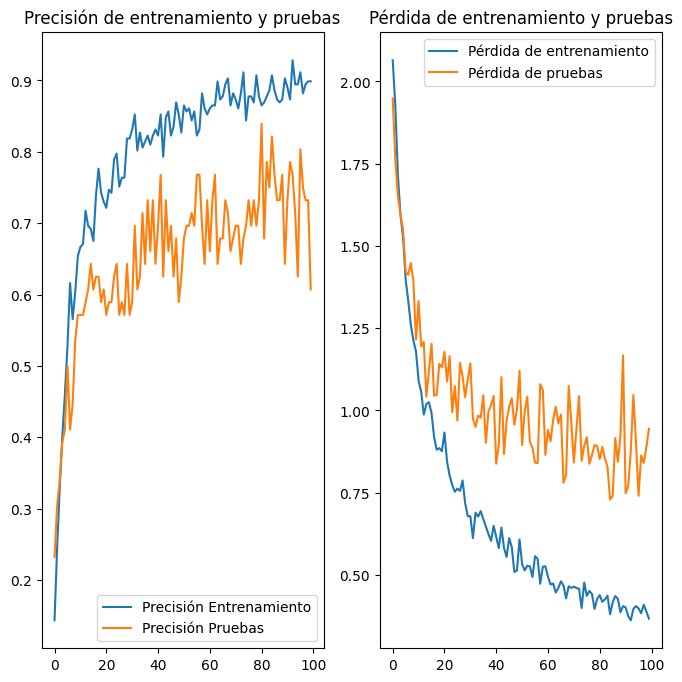

In [11]:
#Graficas de precisión

historial = historial_nasnet
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(EPOCAS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()